In [1]:
from auto_measure_varying_detuning import *

In [2]:
try:
    ctx = Context('pva')
    osc = iapp.Osc_RS()
    func_gen = iapp.Func_Gen()
except Exception as e:
    # Handle any exception here
    print(f"An error occurred:\n {e}")
    ctx = None
    osc = None
    func_gen = None

In [ ]:
B = 5
window = MeasureWindow(ctx=ctx, osc=osc, func_gen=func_gen, Current=B)

In [ ]:
window.go_to_freq(1036)
time.sleep(0.5)
window.FluoCurve_auto_meas(1027)

Error: 
Photo at 1027.00 MHz
x_min = -3.0000092, x_max = 3.000055, record_length = 131064.0


In [7]:
D_L = 1036
Detuning_list = range(1023, 1050, 2)
for D in Detuning_list:
  time.sleep(1)
  window.go_to_freq(D_L)
  time.sleep(1)
  window.FluoCurve_auto_meas(D)
  time.sleep(5)
  window.save_data_osc(Det=D)

Photo at 1023.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1025.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1027.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1029.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1031.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1033.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1035.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1037.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1039.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1041.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1043.00 MHz
x_min = -2.9999009, x_max = 2.9998551, record_length = 130920.0
Photo at 1045.00 MHz
x_min = -2.9999009, x_max = 2.9998551, recor

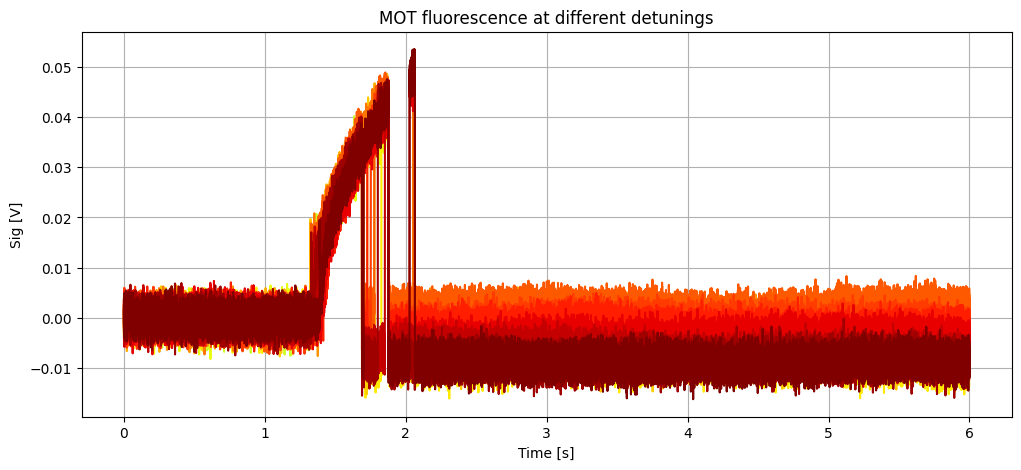

In [8]:
from pathlib import Path
import matplotlib.pyplot as plt

directory = Path('.')

B = 5
D_vals =  range(1023, 1050, 2) # MHz

color_palette = plt.cm.jet(np.linspace(0.6, 1, len(D_vals)))

_, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.set_title(f'MOT fluorescence at different detunings')

for i, D in enumerate(D_vals):
  file_list = list(directory.glob(f"B={B}_D={D}.csv"))
  df = pd.read_csv(file_list[0], header=1, names=['Time [s]', 'Sig [V]'])
  
  x_data = df['Time [s]'].to_numpy()
  x_data = x_data - np.min(x_data)
  index_offset = (x_data > 0.2) * (x_data < 0.5)
  y_data = df['Sig [V]'].to_numpy()
  offset = np.mean(y_data[index_offset])
  
  y_data = y_data - offset
  dy_data = np.std(y_data[index_offset])
  
  N = len(x_data)
  ax.plot(x_data, y_data, label=f'D = {D} MHz', color=color_palette[i])
  ax.set_xlabel('Time [s]')
  ax.set_ylabel('Sig [V]')

#plt.legend(prop=base_font)
plt.grid()
plt.show()